In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['flownet_correspondences'].shape, outs_dict['inputs']['image1'].shape



(torch.Size([5000, 4, 1]), (256, 832, 3))

In [4]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
correspondences = outs_dict['flownet_correspondences'].squeeze()

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

correspondences[0], h, w


(tensor([370.0000, 158.0000, 345.2398, 159.9124], device='cuda:0',
        grad_fn=<SelectBackward>),
 256.0,
 416.0)

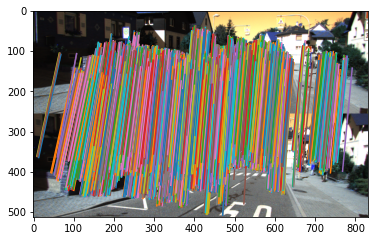

In [6]:
plt.imshow(cat_images, aspect='equal')

for i in range(len(correspondences)):
#     print(correspondences[i])
    plt.plot([correspondences[i][0], correspondences[i][2]], [correspondences[i][1], correspondences[i][3] + h])

plt.savefig('correspondence_out.png')